#  INTRODUCTION

**1.0 OVERVIEW**

Olympic National Park is a United States national park located in the State of Washington, on the Olympic Peninsula. The park has four regions: the Pacific coastline, alpine areas, the west-side temperate rainforest, and the forests of the drier east side. Within the park there are three distinct ecosystems, including subalpine forest and wildflower meadow, temperate forest, and the rugged Pacific coast.

**1.0 AIM**

To use Moja-Global [land sector datasets](https://drive.google.com/drive/folders/1PZCVksHsuNyPzB9QTyraBSs1C7_c7W56) to come out with relevant data about Brazil.


# REPOSITORY

**2.0 IMPORT LIBARIES**

In [1]:
# Import all necessary libraries and load funtioncs used
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import geoplot as gplt 
import geoplot.crs as gcrs 
import folium

def get_df(link):    
    """
    Inputs a link to a json/geojson file 
    and returns the dataframe
    """
    try:
        return gpd.read_file(link)
    except Exception as e:
        print(e)
        print("Retrieving the Dataframe from url.")
        req = requests.get(link).content
        return gpd.read_file(io.StringIO(req.decode('utf-8')))


def plot_boundary(df, ax, color='none', edgecolor='black'):
    """
    Plots the administrative boundaries
    """
    df.plot(ax=ax, color=color, edgecolor=edgecolor)

    
def plot_feature(df, ax, column, edgecolor='black', cmap='tab20'):
    """
    Plots the features
    """
    df.plot(ax=ax, column=column, edgecolor=edgecolor, cmap=cmap, legend=True)
    
    
def clip_df(df_complete, df_n):
    """
    Clips the dataset to retain only the necessary data
    """
    return df_complete.clip(df_n)


def column_std(df):
    """
    Standardises column names
    """
    return df.columns.str.lower()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**ADMINISTRATION**

In [2]:
# load the dataset

usa_admin = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Week_two/Datasets/USA_AL2_United States_WSR.json")
usa_all_states = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Week_two/Datasets/USA_ALL_states.json")
wdc_admin = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Week_two/Datasets/USA_AL4_Washington_WSR.json")
onp_admin = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Week_two/Datasets/olympic-national-park_536.geojson")


#display the first 100 heads
usa_admin.head(100)
print("\n")

usa_all_states.head(100)
print("\n")

wdc_admin.head(100)
print("\n")

onp_admin.head(100)
print("\n")

#display the shapes
usa_admin.shape
print("\n")

usa_all_states.shape
print("\n")

wdc_admin.shape
print("\n")

onp_admin.shape
print("\n")

# view all the column titles in the dataframe
usa_admin.columns
print("\n")

usa_all_states.columns
print("\n")

wdc_admin.columns
print("\n")

onp_admin.columns
print("\n")

# check the various data types
usa_admin.dtypes
print("\n")

usa_all_states.dtypes
print("\n")

wdc_admin.dtypes
print("\n")

onp_admin.dtypes
print("\n")

# information about the dataframe
usa_admin.info()
print("\n")

usa_all_states.info()
print("\n")

wdc_admin.info()
print("\n")

onp_admin.info()
print("\n")

# cirdinate system of the dataframe
usa_admin.crs
print("\n")

usa_all_states.crs
print("\n")

wdc_admin.crs
print("\n")

onp_admin.crs
print("\n")

# geo-metric type of dataframe
usa_admin.geom_type
print("\n")

usa_all_states.geom_type
print("\n")

wdc_admin.geom_type
print("\n")

onp_admin.geom_type
print("\n")

































<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     21 non-null     object  
 1   ISO3166_2   21 non-null     object  
 2   name        21 non-null     object  
 3   SNAME       21 non-null     object  
 4   mg_code     21 non-null     int64   
 5   IPCC        21 non-null     object  
 6   adminlevel  21 non-null     int64   
 7   geometry    21 non-null     geometry
dtypes: geometry(1), int64(2), object(5)
memory usage: 1.4+ KB


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   country     56 non-null     object        
 1   ISO3166_2   56 non-null     object        
 2   name        56 non-null     object        
 3   enname      56 no

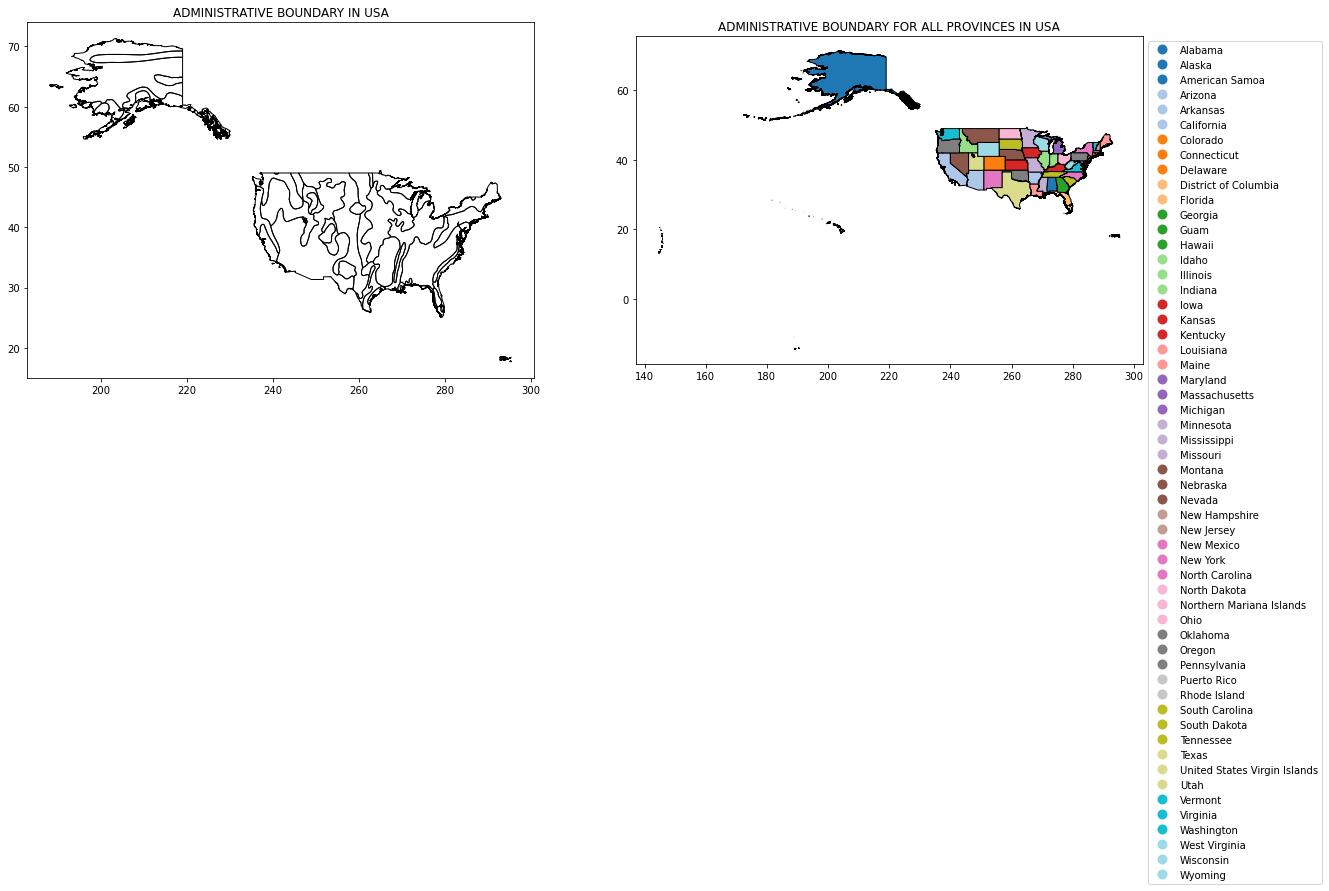

In [3]:
# display the boundary

# Create subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

# Plot the administrative boundary of USA in panel 1
usa_admin.plot(ax=ax1, color="none", edgecolor="black")
ax1.set_title("ADMINISTRATIVE BOUNDARY IN USA")

# Plot the administrative boundaries of all states in panel 2
usa_all_states.plot(ax=ax2,column="name", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("ADMINISTRATIVE BOUNDARY FOR ALL PROVINCES IN USA")

# Display plot
plt.show()

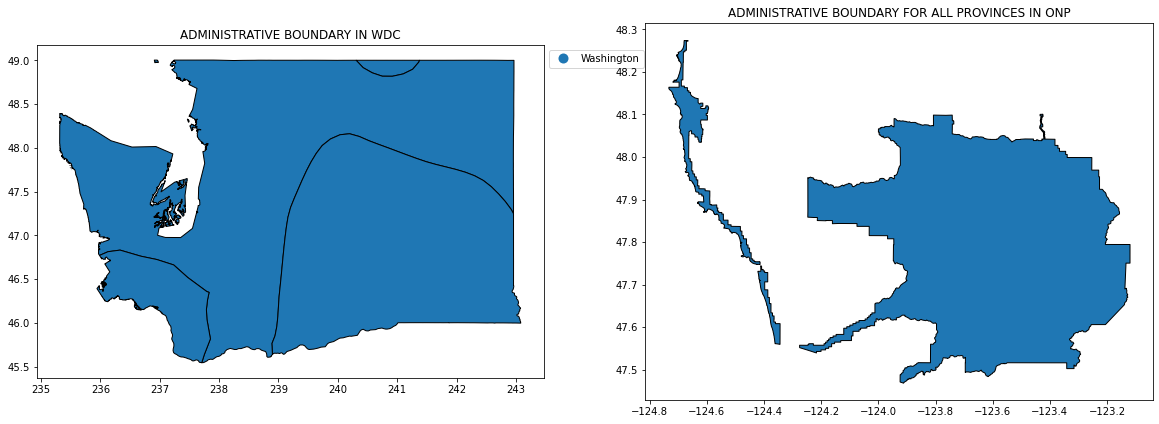

In [4]:
# display the boundary
# Create subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

# Plot the administrative boundary of USA in panel 1
wdc_admin.plot(ax=ax1,column="name", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax1.set_title("ADMINISTRATIVE BOUNDARY IN WDC")

# Plot the administrative boundary ONP in panel 2
onp_admin.plot(ax=ax2, legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, cmap="tab20", edgecolor="black")
ax2.set_title("ADMINISTRATIVE BOUNDARY FOR ALL PROVINCES IN ONP")

# Display plot
plt.show()
wdc_admin.explore()

In [5]:
# Get the total area for USA and the largest state

# Replace EPSG:4326 with a projects CRS of 32642
projected_crs = "EPSG:32642"

# Re-project geometries to a projected CRS
usa_admin = usa_admin.to_crs(projected_crs)

usa_all_states = usa_all_states.to_crs(projected_crs)

wdc_admin = wdc_admin.to_crs(projected_crs)
print("\n")

onp_admin = onp_admin.to_crs(projected_crs)
print("\n")

# Get the total area of USA and the largest state in sqm of the new CRS
total_area = usa_admin["geometry"].area.sum()

usa_all_states["area"] = usa_all_states.geometry.area

print(f"Total Area: {total_area} sqm")
print("\n")

# Reproject geometries to original CRS for usa_admin and usa_all_states
original_crs = "EPSG:4326"
usa_admin = usa_admin.to_crs(original_crs)

usa_all_states = usa_all_states.to_crs(original_crs)

wdc_admin = wdc_admin.to_crs(original_crs)

onp_admin = onp_admin.to_crs(original_crs)






Total Area: 9839280604137.482 sqm




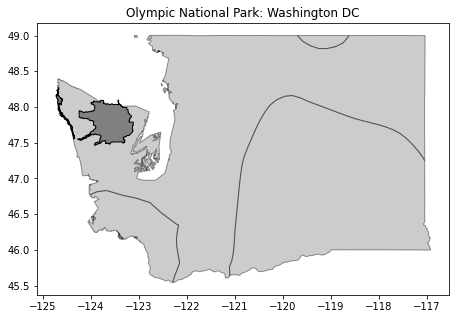

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

wdc_admin.plot(ax=ax, color='grey', edgecolor='black', alpha=0.4)
onp_admin.plot(ax=ax, color='grey', edgecolor='black')

# Set title
plt.title('Olympic National Park: Washington DC')

# Show plot
plt.show()
onp_admin.explore()

**BIOCLIMATIC AND ECOLOGICAL ZONES**

In [7]:
# Access global biodiversity hotspots
global_bio_div_hotspots = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Datasets/CI_BiodiversityHotspots.geojson")

# Extract information for wdc and onp biodiversity hotspots
wdc_biohotspots = global_bio_div_hotspots.clip(wdc_admin)
wdc_biohotspots = wdc_biohotspots.reset_index(drop=True)

onp_biohotspots = global_bio_div_hotspots.clip(onp_admin)
onp_biohotspots = onp_biohotspots.reset_index(drop=True)

#display the first 100 heads
global_bio_div_hotspots.head(100)

onp_biohotspots.head(100)

wdc_biohotspots.head(100)
print("\n")

#display the shapes
global_bio_div_hotspots.shape

onp_biohotspots.shape

wdc_biohotspots.shape
print("\n")

# view all the column titles in the dataframe
global_bio_div_hotspots.columns

onp_biohotspots.columns

wdc_biohotspots.columns
print("\n")

# check the various data types
global_bio_div_hotspots.dtypes

onp_biohotspots.dtypes

wdc_biohotspots.dtypes
print("\n")

# information about the dataframe
global_bio_div_hotspots.info()

onp_biohotspots.info()

wdc_biohotspots.info()
print("\n")

# cirdinate system of the dataframe
global_bio_div_hotspots.crs

onp_biohotspots.crs

wdc_biohotspots.crs
print("\n")

# geo-metric type of dataframe
global_bio_div_hotspots.geom_type

onp_biohotspots.geom_type

wdc_biohotspots.geom_type
print("\n")









<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      53 non-null     int64   
 1   NAME          53 non-null     object  
 2   Type          53 non-null     object  
 3   Shape_Length  53 non-null     float64 
 4   Shape_Area    53 non-null     float64 
 5   geometry      53 non-null     geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 2.6+ KB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 0 entries
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      0 non-null      int64   
 1   NAME          0 non-null      object  
 2   Type          0 non-null      object  
 3   Shape_Length  0 non-null      float64 
 4   Shape_Area    0 non-null      float64 
 5   geometry      0 non-null      geometry
dty

/tmp/ipykernel_972/1049662374.py:5: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  wdc_biohotspots.plot(column="NAME", cmap="tab20", ax=ax1, legend=True)
/tmp/ipykernel_972/1049662374.py:10: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  wdc_biohotspots.plot(column="Type", cmap="tab20", ax=ax2, legend=True)


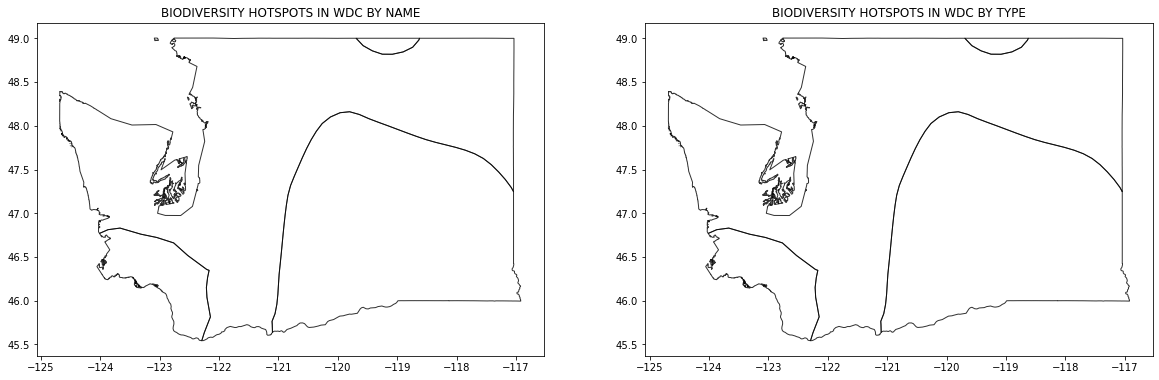

In [8]:
 # Create subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

# Plot the hotspots by name in panel 1
wdc_biohotspots.plot(column="NAME", cmap="tab20", ax=ax1, legend=True)
wdc_admin.plot(ax=ax1, color="none", edgecolor="black", alpha = 0.8)
ax1.set_title("BIODIVERSITY HOTSPOTS IN WDC BY NAME")

# Plot the hotspots by type in panel 2
wdc_biohotspots.plot(column="Type", cmap="tab20", ax=ax2, legend=True)
wdc_admin.plot(ax=ax2, color="none", edgecolor="black", alpha = 0.8)
ax2.set_title("BIODIVERSITY HOTSPOTS IN WDC BY TYPE")

# Display the plot
plt.show()

plot returns an empty map error because dataset contains no data for ONP

**ECOLOGICAL ZONES**

In [9]:
# load the dataset
usa_admin_wsr = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Week_two/Datasets/USA_AL2_United States_WSR.json")
wdc_admin_wsr = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Week_two/Datasets/USA_AL4_Washington_WSR.json")

# Extract information for wdc and onp ecological zones
wdc_admin_wsr = usa_admin_wsr.clip(wdc_admin)
wdc_admin_wsr = wdc_admin_wsr.reset_index(drop=True)

onp_admin_wsr = wdc_admin_wsr.clip(onp_admin)
onp_admin_wsr = onp_admin_wsr.reset_index(drop=True)

#display the first 100 heads
usa_admin_wsr.head(100)

wdc_admin_wsr.head(100)

onp_admin_wsr.head(100)
print("\n")

#display the shapes
usa_admin_wsr.shape

wdc_admin_wsr.shape

onp_admin_wsr.shape
print("\n")

# view all the column titles in the dataframe
usa_admin_wsr.columns

wdc_admin_wsr.columns

onp_admin_wsr.columns
print("\n")

# check the various data types
usa_admin_wsr.dtypes

wdc_admin_wsr.dtypes

onp_admin_wsr.dtypes
print("\n")

# information about the dataframe
usa_admin_wsr.info()

wdc_admin_wsr.info()

onp_admin_wsr.info()
print("\n")

# cirdinate system of the dataframe
usa_admin_wsr.crs

wdc_admin_wsr.crs

onp_admin_wsr.crs
print("\n")

# geo-metric type of dataframe
usa_admin_wsr.geom_type

wdc_admin_wsr.geom_type

onp_admin_wsr.geom_type
print("\n")









<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     21 non-null     object  
 1   ISO3166_2   21 non-null     object  
 2   name        21 non-null     object  
 3   SNAME       21 non-null     object  
 4   mg_code     21 non-null     int64   
 5   IPCC        21 non-null     object  
 6   adminlevel  21 non-null     int64   
 7   geometry    21 non-null     geometry
dtypes: geometry(1), int64(2), object(5)
memory usage: 1.4+ KB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 0 entries
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     0 non-null      object  
 1   ISO3166_2   0 non-null      object  
 2   name        0 non-null      object  
 3   SNAME       0 non-null      object  
 4   mg_code     0 non-null      int64   
 5   

In [10]:
wdc_admin_wsr["name"].value_counts()

Series([], Name: count, dtype: int64)

**AGROECOLOGICAL ZONES**

In [11]:
# load the dataset
global_Agroeco_zones = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Datasets/GlobalAgroEcologicalZones_GAEZ.geojson")

# check the head
global_Agroeco_zones.head(100)
print("\n")

# check the rows and column
global_Agroeco_zones.shape
print("\n")

# check for unique values present
global_Agroeco_zones["Value"].unique()
print("\n")

In [12]:
# Fix the data and replace numbers with acgroecological zones
values = {"1": "Tropical-Arid", "2": "Tropical-Dry Semi-Arid", "3": "Tropical -Moist Semi-Arid", "4": "Tropical-Sub-Humid", "5": "Tropical-Humid", 
          "6": "Tropical-Humid (year round)", "7": "Temperate-Arid", "8": "Temperate-Dry Semi-Arid", "9": "Temperate-Moist Semi-Arid", 
          "10": "Temperate-Sub-Humid", "11": "Temperate-Humid", "12": "Temperate-Humid (year round)", "13": "Boreal-Arid", 
          "14": "Boreal-Dry Semi-Arid", "15": "Boreal-Moist Semi-Arid", "16": "Boreal-Sub-humid", "17": "Boreal-Humid", 
          "18": "Boreal-Humid (year round)"}\

# Standardize the column names
global_Agroeco_zones.columns = global_Agroeco_zones.columns.str.lower()

# Rename class name
global_Agroeco_zones.value = global_Agroeco_zones.value.astype("str").replace(values)

# Check to see replaced values
global_Agroeco_zones.head(100)

,value,geometry
0,Tropical-Arid,"POLYGON ((-33.50000 83.65000, -33.50000 83.500..."
1,Tropical-Arid,"POLYGON ((-37.85000 83.60000, -37.85000 83.500..."
2,Tropical-Arid,"POLYGON ((-32.35000 83.60000, -32.35000 83.500..."
3,Tropical-Arid,"POLYGON ((-31.25000 83.60000, -31.25000 83.500..."
4,Tropical-Arid,"POLYGON ((-34.25000 83.60000, -34.25000 83.500..."
...,...,...
95,Tropical-Arid,"POLYGON ((-70.25000 82.85000, -70.25000 82.650..."
96,Tropical-Dry Semi-Arid,"POLYGON ((-67.25000 82.85000, -67.25000 82.750..."
97,Tropical-Dry Semi-Arid,"POLYGON ((-66.90000 82.85000, -66.90000 82.750..."
98,Tropical-Arid,"POLYGON ((-66.60000 82.90000, -66.60000 82.850..."


In [13]:
# Extract wdc's agroecological zones
wdc_Agroeco_zones = global_Agroeco_zones.clip(wdc_admin)
wdc_Agroeco_zones = wdc_Agroeco_zones.reset_index(drop=True)

onp_Agroeco_zones = wdc_Agroeco_zones.clip(wdc_admin)
onp_Agroeco_zones = onp_Agroeco_zones.reset_index(drop=True)

#display the first 100 heads
wdc_Agroeco_zones.head(100)
print("\n")

#display the shapes
wdc_Agroeco_zones.shape
print("\n")

# view all the column titles in the dataframe
wdc_Agroeco_zones.columns
print("\n")

# check the various data types
wdc_Agroeco_zones.dtypes
print("\n")

# information about the dataframe
wdc_Agroeco_zones.info()
print("\n")

# cirdinate system of the dataframe
wdc_Agroeco_zones.crs
print("\n")

# geo-metric type of dataframe
wdc_Agroeco_zones.geom_type
print("\n")

# Check for unique value and their counts in the selected column
wdc_Agroeco_zones["value"].value_counts()
print("\n")









<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   value     340 non-null    object  
 1   geometry  340 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 5.4+ KB










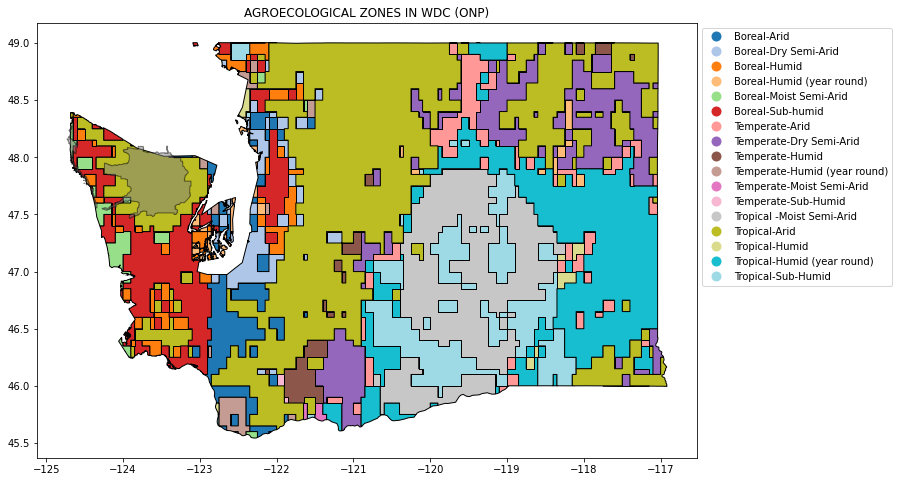

In [14]:
# Create plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the agroecological zones
wdc_Agroeco_zones.plot(ax=ax, cmap="tab20", column="value", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
onp_admin.plot(ax=ax, color="grey", edgecolor='black', alpha=0.5)
plt.title("AGROECOLOGICAL ZONES IN WDC (ONP)")

# Display plot
plt.show()

**HOLDRIDGE LIFEZONES**

In [15]:
#load the data
holdridge_zones = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Datasets/HoldridgeLifeZones.json")

# Extract wdc's holdridge zones
wdc_holdridge_zones = holdridge_zones.clip(wdc_admin)
wdc_holdridge_zones = wdc_holdridge_zones.reset_index(drop=True)

onp_holdridge_zones = holdridge_zones.clip(onp_admin)
onp_holdridge_zones = onp_holdridge_zones.reset_index(drop=True)

#display the first 100 heads
holdridge_zones.head(100)
print("\n")

#display the first 100 heads
wdc_holdridge_zones.head(100)
print("\n")

#display the shapes
wdc_holdridge_zones.shape
print("\n")

# view all the column titles in the dataframe
wdc_holdridge_zones.columns
print("\n")

# check the various data types
wdc_holdridge_zones.dtypes
print("\n")

# information about the dataframe
wdc_holdridge_zones.info()
print("\n")

# cirdinate system of the dataframe
wdc_holdridge_zones.crs
print("\n")

# geo-metric type of dataframe
wdc_holdridge_zones.geom_type
print("\n")

# Check for unique value and their counts in the selected column
wdc_holdridge_zones["DESC"].value_counts()
print("\n")











<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         28 non-null     int64   
 1   AREA        28 non-null     float64 
 2   PERIMETER   28 non-null     int64   
 3   HOLDRIG_    28 non-null     int64   
 4   HOLDRIG_ID  28 non-null     int64   
 5   ZONE        28 non-null     int64   
 6   CASE_       28 non-null     int64   
 7   FREQUENCY   28 non-null     int64   
 8   DESC        28 non-null     object  
 9   SYMBOL      28 non-null     int64   
 10  geometry    28 non-null     geometry
dtypes: float64(1), geometry(1), int64(8), object(1)
memory usage: 2.5+ KB










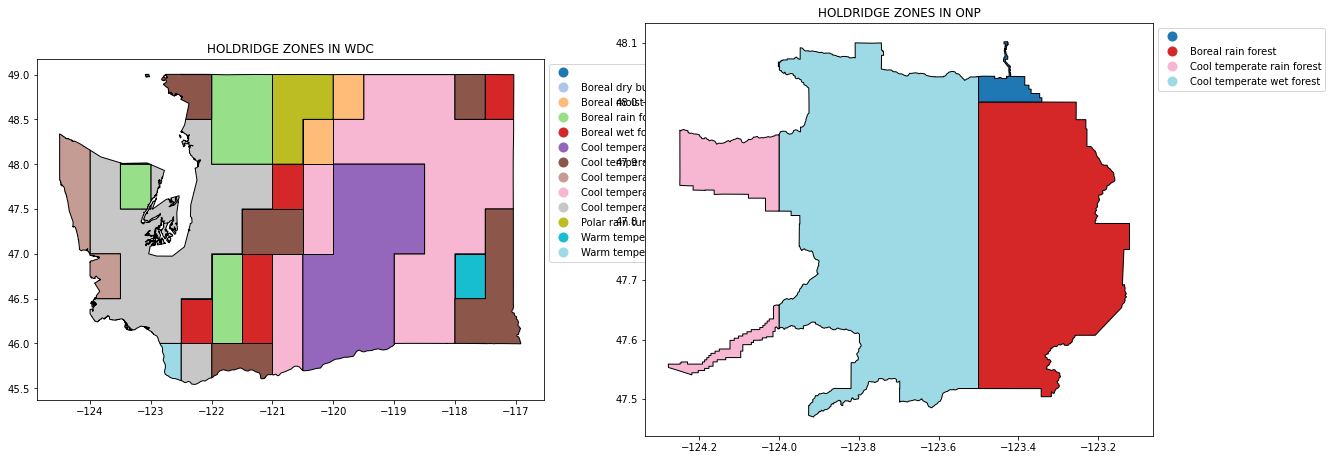

In [16]:
# Create subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot WDC in panel 1
wdc_holdridge_zones.plot(ax=ax1, cmap="tab20", column="DESC", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax1.set_title("HOLDRIDGE ZONES IN WDC")

# Plot onp in panel 2
onp_holdridge_zones.plot(ax=ax2, cmap="tab20", column="DESC", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax2.set_title("HOLDRIDGE ZONES IN ONP")

# Display plot
plt.show()

**TERRESTRAL ECOREGIONS**

In [17]:
#load the data
terr_eco_zones = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Datasets/TerrestrialEcoregionsoftheWorld_WWF.geojson")

# Extract wdc's Terrestral zones
wdc_terr_eco_zones = terr_eco_zones.clip(wdc_admin)
wdc_terr_eco_zones = wdc_terr_eco_zones.reset_index(drop=True)

onp_terr_eco_zones = terr_eco_zones.clip(onp_admin)
onp_terr_eco_zones = onp_terr_eco_zones.reset_index(drop=True)

#display the first 100 heads
terr_eco_zones.head(100)
print("\n")

#display the first 100 heads
wdc_terr_eco_zones.head(100)
print("\n")

#display the shapes
wdc_terr_eco_zones.shape
print("\n")

# view all the column titles in the dataframe
wdc_terr_eco_zones.columns
print("\n")

# check the various data types
wdc_terr_eco_zones.dtypes
print("\n")

# information about the dataframe
wdc_terr_eco_zones.info()
print("\n")

# cirdinate system of the dataframe
wdc_terr_eco_zones.crs
print("\n")

# geo-metric type of dataframe
wdc_terr_eco_zones.geom_type
print("\n")

# Check for unique value and their counts in the selected column
wdc_terr_eco_zones["ECO_NAME"].value_counts()
print("\n")











<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID_1    26 non-null     int64   
 1   OBJECTID      26 non-null     int64   
 2   AREA          26 non-null     float64 
 3   ECO_NAME      26 non-null     object  
 4   REALM         26 non-null     object  
 5   BIOME         26 non-null     int64   
 6   ECO_NUM       26 non-null     int64   
 7   ECO_ID        26 non-null     int64   
 8   ECO_SYM       26 non-null     int64   
 9   GBL_STAT      26 non-null     int64   
 10  G200_REGIO    26 non-null     object  
 11  G200_NUM      26 non-null     int64   
 12  G200_BIOME    26 non-null     int64   
 13  G200_STAT     26 non-null     int64   
 14  area_km2      26 non-null     int64   
 15  eco_code      26 non-null     object  
 16  BIOME_1       26 non-null     object  
 17  GBL_STAT_1    26 non-null     object  

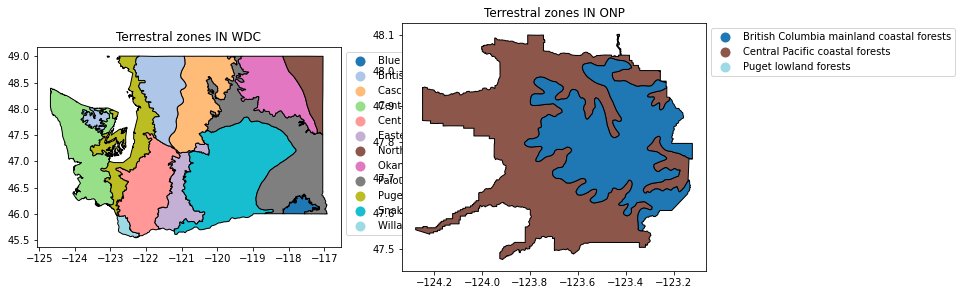

In [18]:
# Create plot for Terrestral zones
# Create subplot with two panels
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

wdc_terr_eco_zones.plot(ax=ax1, cmap="tab20", column="ECO_NAME", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax1.set_title("Terrestral zones IN WDC")

print("\n")

onp_terr_eco_zones.plot(ax=ax2, cmap="tab20", column="ECO_NAME", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
ax2.set_title("Terrestral zones IN ONP")

# Display plot
plt.show()

**SOIL**

In [19]:
#load the data
wdc_soil = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Week_two/Datasets/USA_AL4_Washington_WSR.json")

# Extract onp's soils
onp_soil = wdc_soil.clip(onp_admin)
onp_soil = onp_soil.reset_index(drop=True)

#display the first 100 heads
wdc_soil.head(100)
print("\n")

#display the first 100 heads
wdc_soil.head(100)
print("\n")

#display the shapes
wdc_soil.shape
print("\n")

# view all the column titles in the dataframe
wdc_soil.columns
print("\n")

# check the various data types
wdc_soil.dtypes
print("\n")

# information about the dataframe
wdc_soil.info()
print("\n")

# cirdinate system of the dataframe
wdc_soil.crs
print("\n")

# geo-metric type of dataframe
wdc_soil.geom_type
print("\n")

# Check for unique value and their counts in the selected column
wdc_soil["IPCC"].value_counts()
print("\n")











<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   country     4 non-null      object  
 1   ISO3166_2   4 non-null      object  
 2   name        4 non-null      object  
 3   SNAME       4 non-null      object  
 4   mg_code     4 non-null      int64   
 5   IPCC        4 non-null      object  
 6   adminlevel  4 non-null      int64   
 7   geometry    4 non-null      geometry
dtypes: geometry(1), int64(2), object(5)
memory usage: 384.0+ bytes










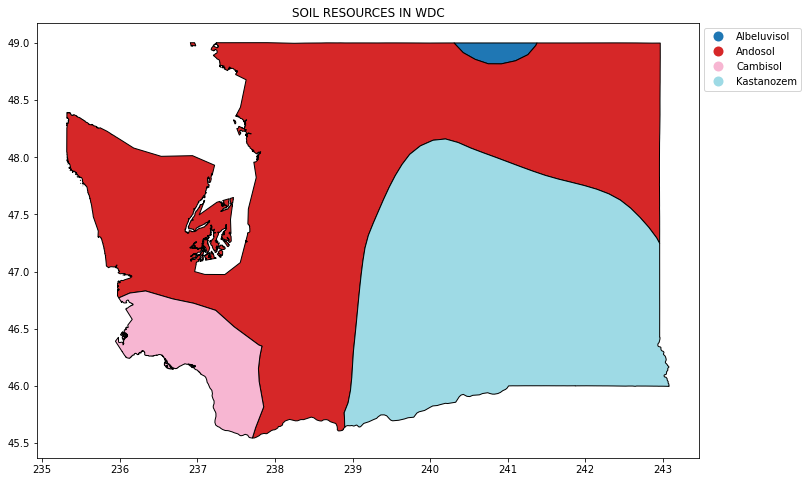

In [20]:
# Create plot for soil resources
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the wdc's soil resoucrces
wdc_soil.plot(ax=ax, cmap="tab20", column="IPCC", legend=True, legend_kwds={"bbox_to_anchor": (1, 1), "loc": "upper left"}, edgecolor="black")
plt.title("SOIL RESOURCES IN WDC")

# Display plot
plt.show()

**CLIMATE**

In [21]:
# load datasets
world_climate_zones = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Datasets/IPCC_ClimateZoneMap_Vector.geojson")

# Extract wdc's Climatic zones
wdc_world_climate_zones = world_climate_zones.clip(wdc_admin)
wdc_world_climate_zones = wdc_world_climate_zones.reset_index(drop=True)

onp_world_climate_zones = world_climate_zones.clip(onp_admin)
onp_world_climate_zones = onp_world_climate_zones.reset_index(drop=True)

#display the first 100 heads
world_climate_zones.head(100)
print("\n")

#display the first 100 heads
wdc_world_climate_zones.head(100)
print("\n")

#display the shapes
wdc_world_climate_zones.shape
print("\n")

# view all the column titles in the dataframe
wdc_world_climate_zones.columns
print("\n")

# check the various data types
wdc_world_climate_zones.dtypes
print("\n")

# information about the dataframe
wdc_world_climate_zones.info()
print("\n")

# cirdinate system of the dataframe
wdc_world_climate_zones.crs
print("\n")

# geo-metric type of dataframe
wdc_world_climate_zones.geom_type
print("\n")

# Check for unique value and their counts in the selected column
wdc_world_climate_zones["CLASS_NAME"].value_counts()
print("\n")











<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CLASS_NAME  56 non-null     int64   
 1   geometry    56 non-null     geometry
dtypes: geometry(1), int64(1)
memory usage: 1.0 KB










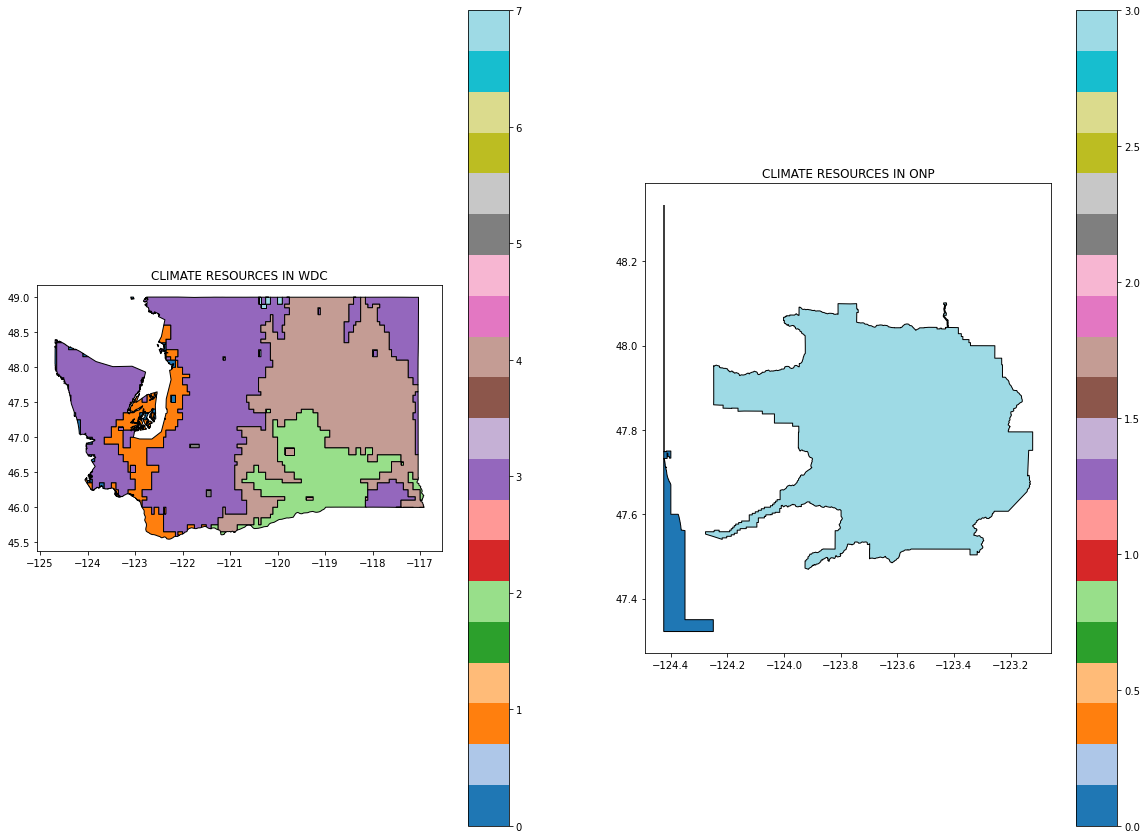

In [22]:
#  Create plot for climate resources
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

# Plot the wdc's climate resoucrces
wdc_world_climate_zones.plot(ax=ax1, cmap="tab20", column="CLASS_NAME", legend=True, edgecolor="black")
ax1.set_title("CLIMATE RESOURCES IN WDC")

onp_world_climate_zones.plot(ax=ax2, cmap="tab20", column="CLASS_NAME", legend=True, edgecolor="black")
ax2.set_title("CLIMATE RESOURCES IN ONP")

# Display plot
plt.show()

**FOREST COVER**

In [28]:
# load dataset
usa_forest = gpd.read_file("file:///home/anonymous/FLINT/Outreachy_May_2024_contributions/Week_two/Datasets/USA_USA_SDPT.json")

# Extract wdc's Forest cover
wdc_forest = usa_forest.clip(wdc_admin)
wdc_forest = wdc_forest.reset_index(drop=True)

onp_forest = wdc_forest.clip(onp_admin)
onp_forest = onp_forest.reset_index(drop=True)


#display the first 100 heads
wdc_forest.head(100)
print("\n")

#display the shapes
wdc_forest.shape
print("\n")

# view all the column titles in the dataframe
wdc_forest.columns
print("\n")

# check the various data types
wdc_forest.dtypes
print("\n")

# information about the dataframe
wdc_forest.info()
print("\n")

# cirdinate system of the dataframe
wdc_forest.crs
print("\n")

# geo-metric type of dataframe
wdc_forest.geom_type
print("\n")

# Check for unique value and their counts in the selected column
wdc_forest["common_name"].value_counts()
print("\n")









<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177991 entries, 0 to 177990
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   final_id       177991 non-null  object  
 1   iso            177991 non-null  object  
 2   country        177991 non-null  object  
 3   org_name       177991 non-null  object  
 4   common_name    177991 non-null  object  
 5   species        177991 non-null  object  
 6   species_simp   177991 non-null  object  
 7   plant_ag       177991 non-null  object  
 8   timber_ag      177991 non-null  object  
 9   ever_dec       177991 non-null  object  
 10  conifer_broad  177991 non-null  object  
 11  hard_soft      177991 non-null  object  
 12  size           177991 non-null  object  
 13  source         177991 non-null  object  
 14  year           177991 non-null  object  
 15  geometry       177991 non-null  geometry
dtypes: geometry(1), object(15)
memory usage:

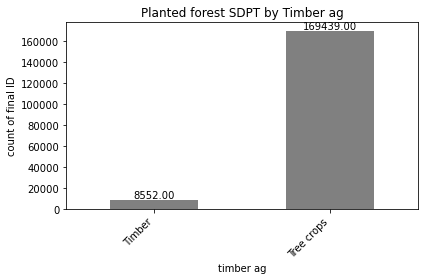

In [29]:
# Group by 'timber_ag' and sum 'final_id'
type_area_sum = wdc_forest.groupby('timber_ag')['final_id'].count()

# Create a bar graph
type_area_sum.plot(kind='bar', color='grey')
plt.title('Planted forest SDPT by Timber ag')
plt.xlabel('timber ag')
plt.ylabel('count of final ID')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add total values on top of the bars
for i, v in enumerate(type_area_sum):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# CONCLUSION

Olympic National Park, with its remarkable biodiversity and stunning landscapes, stands as a testament to the beauty and complexity of the natural world. This analysis has highlighted the park's critical role in conservation, recreation, and cultural heritage. Balancing the preservation of its unique ecosystems against the pressures of tourism and climate change presents ongoing challenges. As stewards of this extraordinary environment, the collective efforts to protect and cherish Olympic National Park will ensure it remains a source of inspiration and wonder for generations to come.

**REFERENCES**

- [Department of Economic and Social Affairs Sustainable Development](https://sdgs.un.org/goals)
- [What is geodata used for](https://www.heavy.ai/technical-glossary/geodata#:~:text=The%20application%20of%20geographic%20data,and%20repair%20of%20network%20anomalies%2C)
- [GDAL documentation](https://gdal.org/api/python_bindings.html)
- [Land Sector Datasets](https://drive.google.com/drive/folders/1PZCVksHsuNyPzB9QTyraBSs1C7_c7W56)
- [Brazil](https://en.wikipedia.org/wiki/Olympic_National_Park)